# 主成分分析

In [45]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# 加载数据集
iris = load_iris()
# 创建X和y变量，存储特征和响应列
iris_X, iris_y = iris.data, iris.target

In [4]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

Text(0.5, 1.0, 'Original Iris Data')

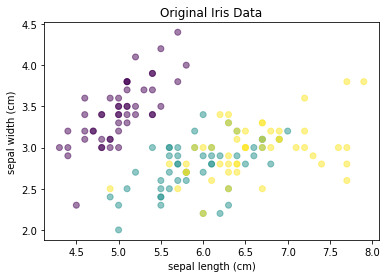

In [34]:
plt.scatter(iris_X[:,0],iris_X[:,1],c=iris_y,alpha=0.5)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Original Iris Data")

In [35]:
def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(range(3),('^', 's', 'o'),
                                              ('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
                    y=X[:,1].real[y == label],
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

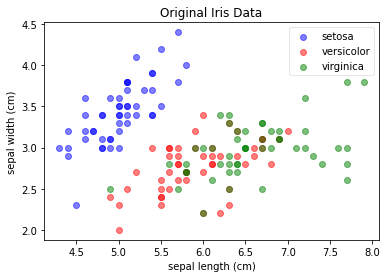

In [36]:
# {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}

plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

In [52]:
iris_X[iris_y==0,0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Text(0.5, 1.0, 'Original Iris Data')

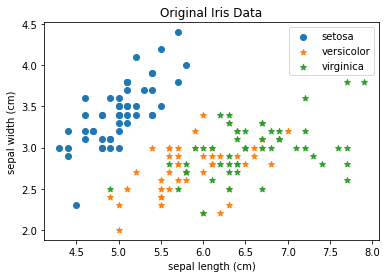

In [63]:
#简单易懂的方式

plt.scatter(iris_X[iris_y==0,0], iris_X[iris_y==0,1], label='setosa', marker='o')
plt.scatter(iris_X[iris_y==1,0], iris_X[iris_y==1,1], label='versicolor', marker='*')
plt.scatter(iris_X[iris_y==2,0], iris_X[iris_y==2,1], label='virginica', marker='*')
leg = plt.legend(loc='upper right', fancybox=True)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Original Iris Data")

# sklearn中的pca

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# 在数据上使用PCA
pca.fit(iris_X)

PCA(n_components=2)

In [67]:
#得出两个主成分的系数矩阵
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [70]:
pca_iris_X = pca.transform(iris_X)

Text(0.5, 1.0, 'Original Iris Data')

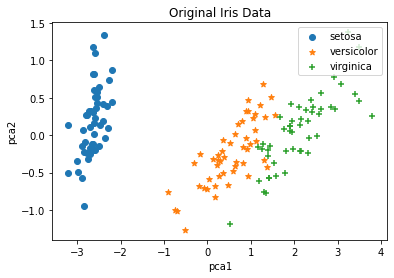

In [85]:
# 绘制主成分后的散点图


#简单易懂的方式

plt.scatter(pca_iris_X[iris_y==0,0], pca_iris_X[iris_y==0,1], label='setosa', marker='o')
plt.scatter(pca_iris_X[iris_y==1,0], pca_iris_X[iris_y==1,1], label='versicolor', marker='*')
plt.scatter(pca_iris_X[iris_y==2,0], pca_iris_X[iris_y==2,1], label='virginica', marker='+')
leg = plt.legend(loc='upper right', fancybox=True)
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.title("Original Iris Data")

In [72]:
# 每个主成分解释的方差百分比,和之前的一样
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [79]:
import pandas as pd
pd.DataFrame(iris_X).corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


# 线性判别分析（LDA）,与pca类似，都是将找到一个新坐标，将高维的数据映射到地位空间中，不同点是其是有监督的分类学习，不会专注数据的方差
而是优化低维空间，已获得最佳的类别可分性

In [ ]:
# 工作原理:

# 计算每个类别的均值向量
# 计算类内和类间的散布矩阵
# 计算的特征值和特征向量
# 降序排列特征值，保留前k个特征向量
# #使用前几个特征向量将数据投影到新空间

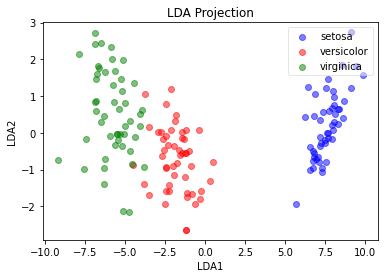

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 实例化LDA模块
lda = LinearDiscriminantAnalysis(n_components=2)

# 拟合并转换鸢尾花数据,注意和PCA不同，需要iris_y
X_lda_iris = lda.fit_transform(iris_X, iris_y)

# 绘制投影数据
plot(X_lda_iris, iris_y, "LDA Projection", "LDA1", "LDA2")